## Init & Data Preprocessing

In [1]:
#when you extract dataSet, plz make cycle one by one, assuring validation set has all 3 labels

import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = "" # or 0 1 to use GPU
import tensorflow as tf
import pandas as pd
import  numpy as np
gpu_options = tf.GPUOptions(allow_growth=True)
%matplotlib inline
from sklearn.metrics.classification import confusion_matrix
import itertools
import matplotlib.pyplot as plt
# sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
# sess = tf.Session(config=tf.ConfigProto(device_count={'gpu':0}))


In [2]:
train=pd.read_csv('trainall_data.csv', header=None) #pandas is easy to watch variables
label=pd.read_csv('trainall_label.csv', header=None)
tt=pd.read_csv('trainall_label2.csv', header=None)
trainn=train.loc[:, 0:15]
train1=trainn.values
label1=label.values
labell=tt.values

# print trainn.describe()
# print label.describe()
# print tt.describe()

# print label


In [3]:
from random import randint,shuffle

X2= []
label2= []
random_fetch=range(1435)
shuffle(random_fetch)


for i in range(1435):
    X2.append(np.reshape(train1[random_fetch[i]],(4,4)))
    label2.append(label1[random_fetch[i]])
        
X2=np.array(X2)
label2=np.array(label2)

X2.shape

(1435, 4, 4)

## Model Part, haven't shuffled yet

In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64,
                        #input_shape=(41000,),
                        activation=tf.nn.relu), # in hidden layer, ReLU has better learning ability than sigmoid
  tf.keras.layers.Dropout(0.2), # drop out some complex neurons randomly, avoiding overfitting
  tf.keras.layers.Dense(64, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(5, activation=tf.nn.sigmoid) #logistic output for each gas element, H2/H2O/METH/ETH/ACE
])

#todo test all optimizer

# model.compile(
#     optimizer='adam',
#     #optimizer=tf.keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True),
#                 #loss=tf.keras.losses.categorical_crossentropy,
#                 loss='sparse_categorical_crossentropy',
#                 #loss=tf.losses.softmax_cross_entropy,
#                 # pred=tf.nn.softmax(tf.add(tf.matmul(X1,W),b)) ,
#                 # cost =tf.reduce_mean(-tf.reduce_sum(label1*tf.log(pred),reduction_indices=1)),
#                 #loss='categorical_crossentropy',
#               metrics=['accuracy'])

In [5]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(lr=0.01),
    #optimizer=tf.keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True),
                #loss=tf.keras.losses.categorical_crossentropy,
                #loss='sparse_categorical_crossentropy',
    
                loss='binary_crossentropy', #set loss as binary for logistic regression
    
                #loss=tf.losses.softmax_cross_entropy,
                # pred=tf.nn.softmax(tf.add(tf.matmul(X1,W),b)) ,
                # cost =tf.reduce_mean(-tf.reduce_sum(label1*tf.log(pred),reduction_indices=1)),
                #loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
from tensorflow.keras.callbacks import TensorBoard
import time

In [7]:
NAME = "enose-64*2-{}".format(int(time.time()))
tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))


In [8]:
#X1=np.tile(X_train,(100,1,1))
#label1=np.tile(label,(100,1))

## if run 1110 samples, make sure the input labels are correct and not modified

# gpu_options = tf.GPUOptions(allow_growth=True)
# sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

from random import randint,shuffle

X2= []
label2= []
random_fetch=range(1435)
shuffle(random_fetch)


for i in range(1435):
    X2.append(np.reshape(train1[random_fetch[i]],(4,4)))
    label2.append(labell[random_fetch[i]])
        
X2=np.array(X2)
label2=np.array(label2)

np.set_printoptions(threshold=10)
random_fetch=np.array(random_fetch)
print(random_fetch)
model.fit(X2, label2, batch_size=20, validation_split=0.1, epochs=50, shuffle=0, callbacks=[tensorboard]) # this shuffle for each epochs, we dont wantit
model.evaluate(X2,label2)

# print label1[368:409]

[1358   53   44 ... 1391  506   41]
Train on 1291 samples, validate on 144 samples
Epoch 1/50
1291/1291 [==============================] - 0s 265us/step - loss: 0.4189 - acc: 0.8113 - val_loss: 0.3872 - val_acc: 0.7958
Epoch 2/50
1291/1291 [==============================] - 0s 72us/step - loss: 0.3574 - acc: 0.8217 - val_loss: 0.3430 - val_acc: 0.8111
Epoch 3/50
1291/1291 [==============================] - 0s 79us/step - loss: 0.3262 - acc: 0.8333 - val_loss: 0.3139 - val_acc: 0.8097
Epoch 4/50
1291/1291 [==============================] - 0s 89us/step - loss: 0.2942 - acc: 0.8517 - val_loss: 0.2853 - val_acc: 0.8514
Epoch 5/50
1291/1291 [==============================] - 0s 93us/step - loss: 0.2739 - acc: 0.8665 - val_loss: 0.2686 - val_acc: 0.8583
Epoch 6/50
1291/1291 [==============================] - 0s 77us/step - loss: 0.2555 - acc: 0.8710 - val_loss: 0.2529 - val_acc: 0.8653
Epoch 7/50
1291/1291 [==============================] - 0s 89us/step - loss: 0.2429 - acc: 0.8767 - val_lo

[0.11231576739080276, 0.9560975613909731]

Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.62 0.38]
 [0.   0.   1.  ]]


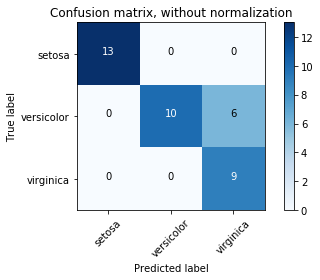

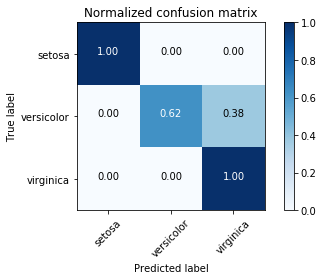

In [9]:

#plot

print(__doc__)

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


In [10]:
from random import randint,shuffle #cnn
X2= []
label2= []
random_fetch=range(1435)
shuffle(random_fetch)

for i in range(1435):
    X2.append(np.reshape(train1[random_fetch[i]],(4,4)))
    label2.append(labell[random_fetch[i]])
        
X2=np.array(X2)
label2=np.array(label2)
trainn=X2

In [11]:
x_train=trainn
y_train=label2
# x_train = x_train.astype(np.float32) / 255
x_train=x_train.astype(np.float32)
x_train = np.expand_dims(x_train, -1)
# y_train = tf.one_hot(y_train, 1)
# y_train=label
# x_train.shape
y_train.shape

(1435, 5)

## Data Visualization

In [15]:
np.set_printoptions(threshold='none')
test_labels = label2[1291:1435,:]
rounded_predictions = model.predict(X2[1291:1435,:])
# print test_labels
print rounded_predictions.shape
print (X2.shape)
len(rounded_predictions)

(144, 5)
(1435, 4, 4)


144

In [ ]:
np.set_printoptions(threshold='none')
test_labels = label2[1291:1435,:]
rounded_predictions = model.predict(X2[1291:1435,:])
# print test_labels
print rounded_predictions.shape
len(rounded_predictions)

trans_predictions=np.zeros((144,5),dtype=int)

for i in range(len(rounded_predictions)): # i, the num of stages
    for t in range(5):
        if rounded_predictions[i,t]>=0.5:
            trans_predictions[i,t]=1
            
    if list(trans_predictions[i,:])==[0,0,0,0,0]:
        for t in range(5):
            if rounded_predictions[i,t]>=0.4:
                trans_predictions[i,t]=1
                
#         else trans_perdictions(i,t)=0
print trans_predictions.shape

MCM = np.zeros((5,5),dtype=int)
for i in range(len(rounded_predictions)):
#     if list(trans_predictions[i,:])==[0,0,0,0,0]:
#         pre_error=list(rounded_predictions[i,:])
#         raise ValueError("Model prediction comes up with error. The error num is %s, with rounded as %s" % (i,pre_error)
#                        )
    for t in range(5):
        if test_labels[i,t] and trans_predictions[i,t]: #True-positive, actually for multiple class there are no po/ne
            MCM[t,t]=MCM[t,t]+1
        elif test_labels[i,t]:  # False
            for t2 in range(5):
                if trans_predictions[i,t2]:
                    MCM[t,t2]=MCM[t,t2]+1  
        
        
print MCM    
        
        


In [ ]:
np.set_printoptions(precision=2)
gas_names=np.array(['H2','H2O','Methanol','Ethanol','Acetone'])
plt.figure()
plot_confusion_matrix(MCM, classes=gas_names,
                     title='MCM without normalization')
plt.show()

In [ ]:
# print trans_predictions[29,:]
print rounded_predictions[29,:]
# print trans_predictions
print test_labels[29,:]

In [ ]:
!tensorboard logdir='/home/hzy/MLP Test3.py'


## Try CNN in Keras

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import numpy as np
import os
import tempfile

import tensorflow.keras
from tensorflow.keras import backend as K
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import tensorflow as tf


if K.backend() != 'tensorflow':
    raise RuntimeError('This example can only run with the TensorFlow backend,'
                       ' because it requires the Datset API, which is not'
                       ' supported on other platforms.')


def cnn_layers(inputs):
    x = layers.Conv2D(32, (3, 3),
                      activation='relu', padding='valid')(inputs)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    predictions = layers.Dense(num_classes,
                               activation='sigmoid',
                               name='x_train_out')(x)
    return predictions

SIZE = (4,4)

batch_size = 24
buffer_size = 100
steps_per_epoch = int(np.ceil(1435 / float(batch_size)))  # = 469
epochs = 5
num_classes = 5
#Create the dataset and its associated one-shot iterator

dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
dataset = dataset.repeat()
dataset = dataset.shuffle(buffer_size)
dataset = dataset.batch(batch_size)
iterator = dataset.make_one_shot_iterator()

# Model creation using tensors from the get_next() graph node.
inputs, targets = iterator.get_next()
model_input = tensorflow.keras.layers.Input(tensor=inputs)
model_output = cnn_layers(model_input)
train_model = keras.models.Model(inputs=model_input, outputs=model_output)

train_model.compile(optimizer=keras.optimizers.RMSprop(lr=2e-3, decay=1e-5),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'],
                    target_tensors=[targets])


In [ ]:
list(trans_predictions[3,:])
# np.array([0,0])

In [ ]:
trans_predictions=np.zeros((143,5),dtype=int)
trans_predictions
len(rounded_predictions)

In [ ]:
from collections import Sequence
from scipy.sparse.base import spmatrix

cm = multilabel_confusion_matrix(test_labels,rounded_predictions)

In [ ]:
print label2[18]
X2.shape
test=np.reshape(X2[18],[1,4,4])

In [ ]:
model.predict(test)

In [ ]:
import sklearn
sklearn.__version__

 ### Appently, the data performance between meth part, ace part and eth part are not that good, i.e. if we use single raw data set extracting from a single experience. The performance would be great (shown as below) because of the data correlation and sigularity. 

### In a word, we can not determine if the data presented from our experiments can differ from each other that well. That is a very significant prerequsite. Assuming there are better network structure to explore, I think we can enhance this MLP with the following aspects.

## 1. More reasonable normalization method. Maybe instead of using the last time point, there are better solution.
## 2. Adding more layers as well as tuning parameters for better performance. 
## 3. When we do shuffling, try to use random search instead of grid seach.
## 4. Increasing the number of samples in trainingSet, however it has been experienced before and it was not that effective.

In [ ]:
train_a=np.reshape(X1[410:820,:,:],[410,16]) # acetone
label_a=label1[410:820]
train_vi=pd.DataFrame(train_a)
train_vi.describe()
print label_a
import matplotlib.pyplot as plt
train_vi.plot(kind='scatter',x=2,y=1)
plt.show()

In [ ]:
train_a=X1[410:820,:,:] # acetone
label_a=label1[410:820]
# print train_a
# print label_a

In [ ]:
np.set_printoptions(threshold='none')
print train_a.shape
print label_a.shape
print label_a #acetone
print X.shape

In [ ]:
a=range(10)
shuffle(a)
print a
np.set_printoptions(threshold='none')
label1

In [ ]:
#shuffling the cycles for 410,acetone

from random import randint,shuffle
train_a=X1[410:820,:,:] # acetone
label_a=label1[410:820]

X2= []
label2= []
random_fetch=range(10)
shuffle(random_fetch)
train_ace=X1

for i in range(10):
    for k in range(41):
        X2.append(np.reshape(train_a[random_fetch[i]*41+k],(4,4)))
        label2.append(label_a[random_fetch[i]*41+k])   
    
X2=np.array(X2)
label2=np.array(label2)


print random_fetch
np.set_printoptions(threshold=3)
print X2
print label2

In [ ]:
tess=np.array([[1,2,3],[4,5,6]])
t=np.tile(tess,(2,1))
t

In [ ]:
np.set_printoptions(threshold='none')
print label_a
train_sub=train_a[0:369,:,:]
label_sub=label_a[0:369]  
print label_a[409]

In [ ]:
# gpu_options = tf.GPUOptions(allow_growth=True)
# sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
from random import randint,shuffle

train_a=X2
label_a=label2

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64,
                        #input_shape=(41000,),
                        activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])

for i in range(410):
    if label_a[i]==3:
        label_a[i]=1
    elif label_a[i]==4:
        label_a[i]=2

# tiling the data
train_sub=train_a[0:369,:,:]
train_lab=label_a[0:369]
valid_sub=train_a[369:410,:,:]
valid_lab=label_a[369:410]
m1=np.tile(train_sub,(100,1,1))
m2=np.tile(valid_sub,(100,1,1))
m3=np.tile(train_lab,(100,))
m4=np.tile(valid_lab,(100,))
label_input=np.concatenate([m3,m4])
train_input=np.concatenate([m1,m2])

train_input1=np.tile(train_a,(100,1,1))
label_input1=np.tile(label_a,(100,))


np.set_printoptions(threshold='none')

model.compile(
    optimizer='adam',
    #optimizer=tf.keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True),
                #loss=tf.keras.losses.categorical_crossentropy,
                loss='sparse_categorical_crossentropy',
                #loss=tf.losses.softmax_cross_entropy,
                # pred=tf.nn.softmax(tf.add(tf.matmul(X1,W),b)) ,
                # cost =tf.reduce_mean(-tf.reduce_sum(label1*tf.log(pred),reduction_indices=1)),
                #loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_input, label_input, validation_split=0.1, epochs=5)
model.evaluate(train_input,label_input)

# print label1[368:409]

In [ ]:
label_input.shape

In [ ]:
label_a.s

In [ ]:
tess=[]
tess=np.array(tess)

In [ ]:
tess

In [ ]:
sess.close()

In [ ]:
label1

In [ ]:
sess = tf.Session()
#print sess.run(model.fit)
sess.close()

In [ ]:
test=np.reshape(X1[399],(1,4,4))

In [ ]:
test.shape

In [ ]:
np.set_printoptions(threshold='none')
#label1
y

In [ ]:
label1[399]

In [ ]:
print(model.predict(test,batch_size=10,verbose=0))

In [ ]:
print(model.predict_classes(test,batch_size=10,verbose=0))